MainProcess


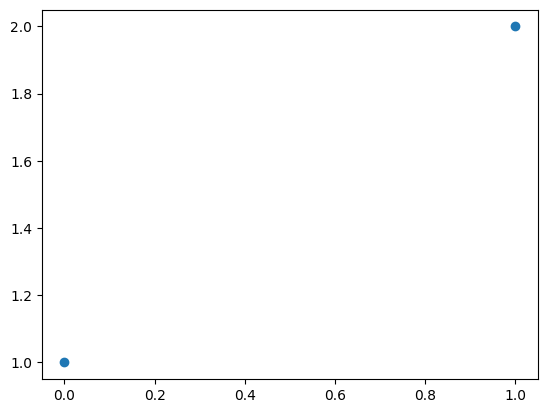

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 71
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.cos_lr = False

In [5]:
model.train(loaded_data.train_data, loaded_data.test_data)
fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
import shutil
shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
fls.dill_save(fls.temp_dir + '/intermediate_weights/model.pickle', model)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.129 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.128 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=22, cls=0.5, conf=None, copy

train: Scanning /flagellar/temp/yolo_dataset/labels/train.cache... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████| 2994/2994 [00:00<?, ?it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1678.4±1204.8 MB/s, size: 77.2 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val.cache... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 71 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/71      4.81G      2.842       3.98      1.282         12        640: 100%|██████████| 249/249 [00:21<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.60it/s]

                   all        393        369      0.394      0.447      0.356     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/71      5.69G       2.25      1.918      1.093         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.24it/s]


                   all        393        369      0.575      0.659      0.574      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/71      5.69G      2.131      1.802       1.06         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.44it/s]

                   all        393        369      0.632      0.751      0.696      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/71      5.69G      2.021      1.637      1.037          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369      0.595      0.667      0.661      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/71       5.7G      1.979       1.52      1.018         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.864      0.739       0.83      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/71       5.7G      1.891      1.462      1.003         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.834      0.786      0.851      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/71       5.7G      1.848      1.369     0.9937         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.27it/s]

                   all        393        369      0.897      0.901      0.943      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/71       5.7G      1.777      1.293     0.9782          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.863      0.767      0.871       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/71       5.7G      1.751      1.284     0.9673         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.889      0.864       0.92      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/71       5.7G      1.696      1.215      0.955         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.915      0.843      0.917       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/71       5.7G      1.699      1.204     0.9533         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369      0.913      0.892      0.935      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/71       5.7G      1.629      1.152     0.9358          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.27it/s]

                   all        393        369      0.912      0.902      0.951      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/71       5.7G      1.595        1.1     0.9302         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.944      0.846      0.931      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/71       5.7G      1.564      1.091     0.9266         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.33it/s]

                   all        393        369      0.938      0.902      0.935      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/71       5.7G      1.555      1.059     0.9223         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.32it/s]

                   all        393        369      0.977      0.867      0.944       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/71       5.7G      1.558      1.048     0.9253         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369      0.979      0.875      0.933      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/71       5.7G      1.538      1.048     0.9084         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.949      0.905      0.953      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/71       5.7G      1.505       1.01     0.9095         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369      0.954        0.9      0.961      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/71       5.7G      1.477     0.9891     0.9014          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369      0.956      0.894      0.948      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/71       5.7G       1.42     0.9363     0.8959          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.40it/s]

                   all        393        369      0.953      0.936      0.975      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/71       5.7G      1.431     0.9304     0.8905         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.53it/s]

                   all        393        369      0.925      0.875      0.947       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/71       5.7G      1.408     0.9221     0.8926         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.25it/s]

                   all        393        369      0.954      0.892      0.953      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/71       5.7G      1.401     0.9244     0.8898         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.961      0.908      0.962      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/71       5.7G      1.416     0.9052     0.8914         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.25it/s]

                   all        393        369       0.96       0.93      0.974      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/71       5.7G      1.361     0.8804      0.883         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.47it/s]

                   all        393        369      0.903      0.913      0.942      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/71       5.7G      1.353     0.8598     0.8762         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.16it/s]

                   all        393        369      0.963      0.894      0.955      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/71       5.7G      1.308     0.8597      0.881          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369      0.981      0.897      0.961      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/71       5.7G      1.317     0.8232     0.8797          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.974      0.915      0.962      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/71       5.7G      1.273     0.7887       0.87         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369       0.96      0.908      0.965       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/71       5.7G      1.237     0.8118     0.8641         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369      0.939      0.921       0.96      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/71       5.7G      1.257     0.7905     0.8677         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.33it/s]

                   all        393        369      0.957      0.895      0.957      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/71       5.7G      1.242     0.7929     0.8637          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]

                   all        393        369      0.949      0.908      0.952      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/71       5.7G      1.206     0.7557      0.861         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.59it/s]

                   all        393        369       0.98      0.916      0.975       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/71       5.7G      1.198     0.7509     0.8586          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.973      0.905      0.973       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/71       5.7G      1.201     0.7394     0.8536         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.63it/s]

                   all        393        369      0.977      0.923      0.981      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/71       5.7G      1.173       0.73     0.8576         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.49it/s]

                   all        393        369      0.952      0.913      0.974      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/71       5.7G      1.177     0.7426     0.8553          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.02it/s]

                   all        393        369      0.963      0.913      0.979      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/71       5.7G      1.157     0.7267     0.8521         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.54it/s]

                   all        393        369      0.959      0.908      0.967      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/71       5.7G      1.135     0.6982     0.8467         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.947      0.932      0.973       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/71       5.7G      1.117     0.6932     0.8443          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.974       0.93      0.966      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/71       5.7G      1.121     0.6842     0.8523         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.977      0.897      0.966      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/71       5.7G      1.112      0.687     0.8458         11        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.76it/s]

                   all        393        369      0.971      0.911      0.962      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/71       5.7G      1.077     0.6798      0.844          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.58it/s]

                   all        393        369      0.967      0.927      0.975      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/71       5.7G      1.087     0.6795     0.8487         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.55it/s]

                   all        393        369      0.963      0.925      0.966      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/71       5.7G      1.061     0.6609     0.8468          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.54it/s]

                   all        393        369      0.943      0.919      0.969      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/71       5.7G      1.042     0.6489     0.8389         14        640: 100%|██████████| 249/249 [00:19<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.46it/s]

                   all        393        369      0.964      0.921      0.972      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/71       5.7G      1.038     0.6409     0.8385          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.41it/s]

                   all        393        369      0.951      0.932      0.976      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/71       5.7G      1.038     0.6459     0.8391         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.978      0.946      0.982      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/71       5.7G      1.025     0.6329     0.8361          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.48it/s]

                   all        393        369      0.984      0.927      0.976      0.575


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/71       5.7G     0.8422     0.4598     0.8099          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.61it/s]

                   all        393        369      0.981      0.905      0.972      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/71       5.7G     0.8069       0.43     0.8033          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.964      0.908      0.973      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/71       5.7G     0.7907     0.4277     0.8034          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.985      0.913      0.971       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/71       5.7G     0.7633     0.4094     0.7995          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369      0.991      0.918      0.968        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/71       5.7G     0.7724     0.4096     0.8019          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.72it/s]

                   all        393        369      0.977      0.923      0.962      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/71       5.7G     0.7354     0.3873     0.8016          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.971      0.908      0.967      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/71       5.7G     0.7037     0.3892     0.7957          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.974      0.918      0.966      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/71       5.7G     0.7173     0.3894     0.7913          6        640: 100%|██████████| 249/249 [00:19<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.80it/s]

                   all        393        369      0.974      0.901      0.962      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/71       5.7G     0.7235     0.3869     0.7941          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.64it/s]

                   all        393        369       0.98      0.908      0.968      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/71       5.7G     0.6885     0.3706     0.7896          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369      0.982      0.906      0.967      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/71       5.7G     0.6857     0.3701     0.7907          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.61it/s]

                   all        393        369      0.962      0.919      0.969      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/71       5.7G     0.6598     0.3583     0.7932          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.81it/s]

                   all        393        369      0.988       0.91      0.961      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/71       5.7G     0.6412     0.3503     0.7886          7        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.79it/s]

                   all        393        369      0.969      0.919      0.958      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/71       5.7G     0.6308     0.3421     0.7875          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.78it/s]

                   all        393        369       0.98      0.908      0.962      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/71       5.7G     0.6361     0.3444     0.7886          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.69it/s]

                   all        393        369      0.974      0.915      0.963      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/71       5.7G     0.6208     0.3363     0.7929          6        640: 100%|██████████| 249/249 [00:20<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.67it/s]

                   all        393        369      0.966      0.913      0.962      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/71       5.7G     0.6183     0.3332      0.789          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.68it/s]

                   all        393        369      0.971      0.919      0.961      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/71       5.7G     0.5985     0.3247     0.7874          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.66it/s]

                   all        393        369      0.969      0.913      0.958        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/71       5.7G     0.5889     0.3226     0.7859          9        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.83it/s]

                   all        393        369      0.971      0.916      0.956      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/71       5.7G     0.5904     0.3239     0.7843         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.73it/s]

                   all        393        369      0.972      0.913      0.956      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/71       5.7G     0.5718     0.3141     0.7833          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.77it/s]

                   all        393        369      0.982      0.907      0.959      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/71       5.7G     0.5582      0.309     0.7813          8        640: 100%|██████████| 249/249 [00:19<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.60it/s]

                   all        393        369      0.984      0.908       0.96      0.605



71 epochs completed in 0.429 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 52.0MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 52.0MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.94it/s]


                   all        393        369      0.955      0.921       0.97      0.576
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!


In [ ]:
import ultralytics
import time
test_data = loaded_data.test_data
data_list = []
times = []
epoch_list = np.arange(10,71,10)
for epoch in epoch_list:
    t=time.time()
    model = fls.dill_load(fls.temp_dir + '/intermediate_weights/model.pickle')
    model.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
    model.step1Labels.concentration = 2
    model.run_in_parallel=False
    data_list.append(model.infer(test_data))
    times.append(time.time()-t)
fls.dill_save(fls.temp_dir + 'intermediate_data.pickle', data_list)

Clearing cupy
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
Processing tomogram tomo_512f98 (1/1)
Processing 400 out of 800 slices (CONCENTRATION=2)
FINAL
      z    y    x  confidence
0   625  324  527    0.359375
1     6  133  631    0.319092
2   535  381  508    0.235107
3   655  423  349    0.205566
4   663  895  702    0.188354
5   635  304   92    0.174927
6   683  495  434    0.155640
7   673  491  415    0.151978
8   677  388  476    0.133911
9   449  847  719    0.124634
10  713  543  119    0.121704
11  210   15  434    0.114746
12  547  365  528    0.111267
13  663  433  724    0.105591
14  645  378  630    0.104126
15  751  558  188    0.099487
16    4  121  582    0.083313
17  407  815  627    0.081238
18    6  296  644    0.079468
19  455  416  611    0.078064
20  346  585  775    0.076660
21   24  356  634    0.073975
22  555  371  489    0.072632
23  589  648  727    0.072083

Clearing pytorch
Clearing cupy
Processing tomogram tomo_d0

In [ ]:
times

In [ ]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores = []
for d in data_list:
    a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
    scores.append(fls.score_competition_metric(a,b))
plt.plot(epoch_list,scores)
plt.grid(True)
plt.legend(['Precision', 'Recall', 'Score'])

yolov8m (seed 1004?)

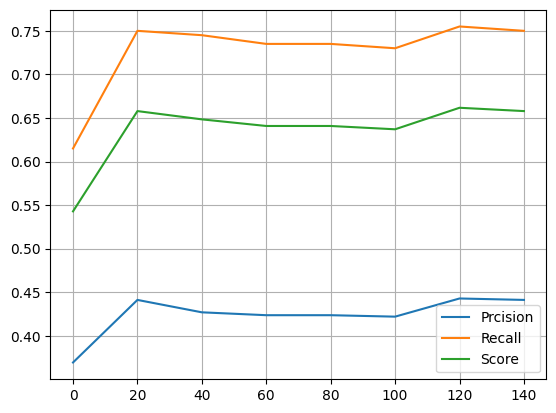

yolov8m (seed 1002?)

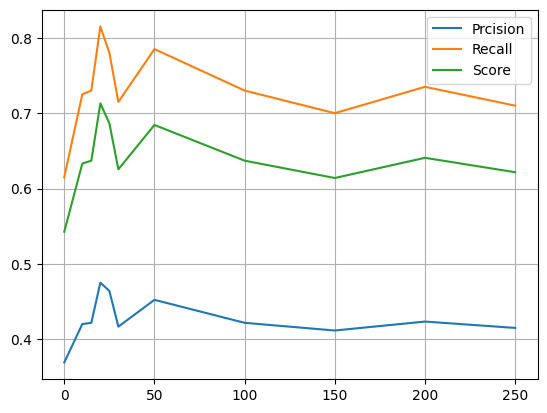

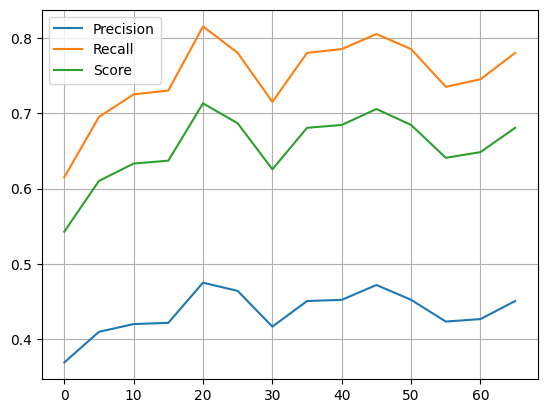

yolov8m (seed 1002?) no mosaic

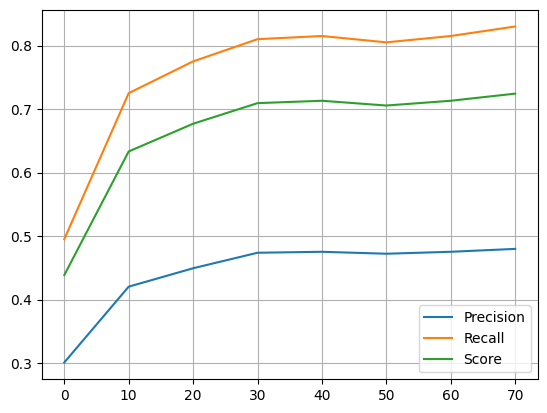

In [ ]:
2